## 29. Numerical optimization algorithms in machine learning

So far we have discussed several machine learning and neural networks related algorithms and approaches. Machine learning is more or less about optimization: we want to minimize the error - that is represented with a cost-function.

There are several approaches to do so (we have considered most of these approaches in the previous lectures but here we take a look at the implementations as well):

- Gradient descent
- Stochastic gradient descent
- AdaGrad
- RMSProp
- ADAM optimizer

### Gradient Descent

- Gradient Descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function
- It was first proposed by Cauchy back in 1847
- The derivative of the f(x) cost-function is pointing in the direction of the maximum (minimum)


In [18]:
# Gradient Descent

from numpy import arange
import numpy as np



# this is the cost-function
def f(x):
    return x * x


# derivative of the cost-function
def df(x):
    return 2 * x


# gradient descent algorithm - n is the number of iterations
# and alpha is the learning rate
def gradient_descent(x, start, end, n, alpha, momentum = 0.0):
    # we track the results (x and f(x) values as well)
    x_values = []
    y_values = []
    # generate the initial starting point (random value)
    
    
    for i in range(n):  # n iterations
        # this is the gradient descent formula (based on the derivative)
        # x = x - alpha * df(x)
        # Gradient Descent with Momentum
        x = x - alpha * df(x) - momentum * x # momentum uses the prevous value
        # we store x and f(x) values
        x_values.append(x)
        y_values.append(f(x))
        # print('#%d f(%s) - %s' % (i, x, f(x)))

    return [x_values, y_values]

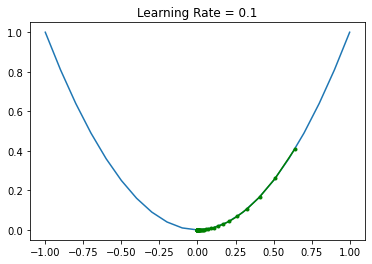

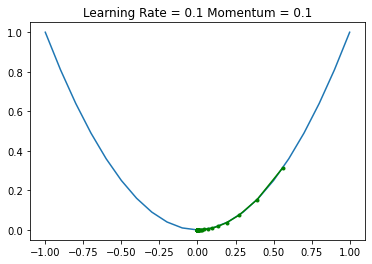

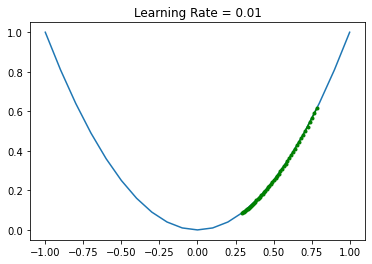

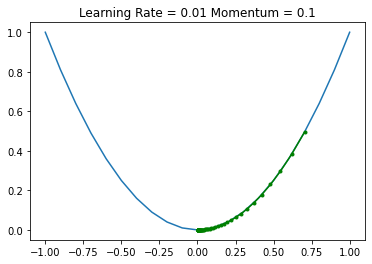

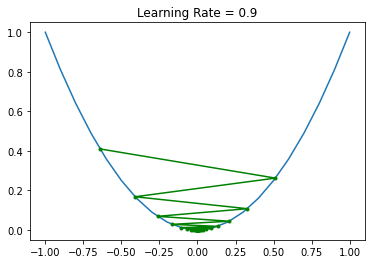

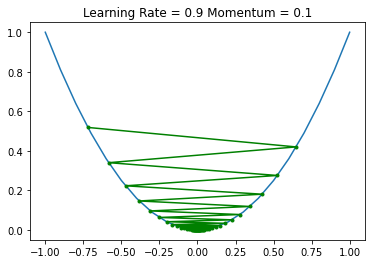

In [28]:
from matplotlib import pyplot as plt

def draw_gradient_descent(start, end, n, learning_rate, momentum):
    # x = np.random.uniform(start, end)
    x = 0.8
    # perform the gradient descent search
    solutions, scores = gradient_descent(x, start, end, n, learning_rate)
    solutions_m, scores_m = gradient_descent(x, start, end, n, learning_rate, momentum)

    # sample input range uniformly at 0.1 increments to plot the function
    inputs = arange(start, end+0.1, 0.1)

    # create a line plot of input vs result
    plt.plot(inputs, f(inputs))
    # this is how we plot the steps of the algorithm
    plt.title('Learning Rate = '+str(learning_rate))
    plt.plot(solutions, scores, '.-', color='green')
    plt.show()
    plt.plot(inputs, f(inputs))
    # this is how we plot the steps of the algorithm
    plt.title('Learning Rate = '+str(learning_rate) + ' Momentum = ' + str(momentum))
    plt.plot(solutions_m, scores_m, '.-', color='green')
    plt.show()

draw_gradient_descent(-1, 1, 50, 0.1, 0.1)
draw_gradient_descent(-1, 1, 50, 0.01, 0.1)
draw_gradient_descent(-1, 1, 50, 0.9, 0.1)


### Stochastic Gradient Descent

- Gradient descent considers all the data smaples (in the training dataset) to make an update on the model
- The problem is that it is too slow (does not scale well)
  - Solution: just use one (or few) samples to make a single update
- Stochastic Gradient Descent selects a random sample to make the next update on the model
- Usually a better approach is to select a subset of the samples at random (minibatches) to make an update
- An epoch is when all the minibatches have been considered once

In [29]:
# Stochastic Gradient Descent
from sklearn.metrics import mean_squared_error


# if batch_size = number of samples (data points) = batch gradient descent
# if batch_size = 1 = Stochastic gradient descent
# if batch_size = [2, n] = mini-batch gradient descent
def sgd(x_values, y_values, alpha=0.01, epoch=20, batch_size=3):
    # initial parameters for slope and intercept
    m, b = 0.5, 0.5    
    error = []  # to store the mean squared error terms (MSE)

    for _ in range(epoch):
        indexes = np.random.randint(0, len(x_values), batch_size)

        xs = np.take(x_values, indexes)
        ys = np.take(y_values, indexes)
        n = len(xs)

        f = (b + m * xs) - ys  # derivated cost function (dC/b)

        m += -alpha * 2 * xs.dot(f).sum() / n
        b += -alpha * 2 * f.sum() / n

        error.append(mean_squared_error(y, b + m * x))

    return m, b, error


In [30]:

import matplotlib.pyplot as plt

def plot_regression(x_values, y_values, y_predictions):
    plt.figure(figsize=(8, 6))
    plt.title('Regression with Stochastic Gradient Descent (SGD)')
    plt.scatter(x_values, y_values, label='Data Points')
    plt.plot(x_values, y_predictions, c='#FFA35B', label='Regression')
    plt.legend(fontsize=10)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()


def plot_mse(mse_values):
    plt.figure(figsize=(8, 6))
    plt.plot(range(len(mse_values)), mse_values)
    plt.title('Stochastic Gradient Descent Error')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.show()

Slope and intercept: 0.8655452536468959 - 0.3796792139818096
MSE: 0.6812345767416812


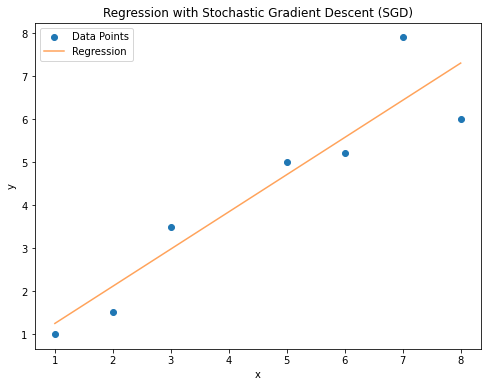

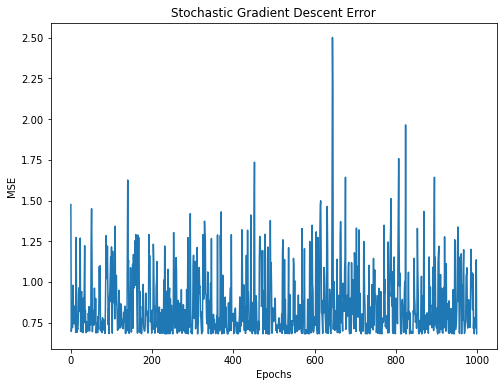

In [31]:
import pandas as pd

x = pd.Series([1, 2, 3, 5, 6, 7, 8])
y = pd.Series([1, 1.5, 3.5, 5, 5.2, 7.9, 6])

slope, intercept, mses = sgd(x, y, alpha=0.01, epoch=1000, batch_size=3)
# the model is the linear regression model
model_predictions = intercept + slope * x

# show the results
print('Slope and intercept: %s - %s' % (slope, intercept))
print('MSE: %s' % mean_squared_error(y, model_predictions))
plot_regression(x, y, model_predictions)
plot_mse(mses)

Slope and intercept: 0.9989227805931761 - 0.007105559148826161
MSE: 1.1672364067396489e-05


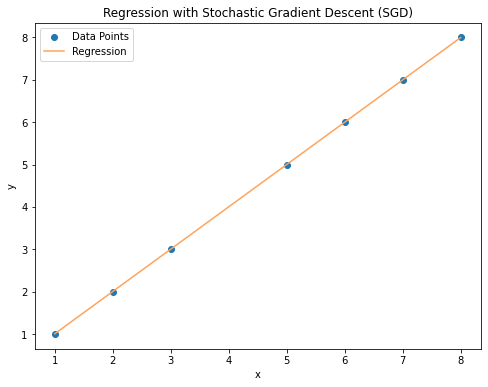

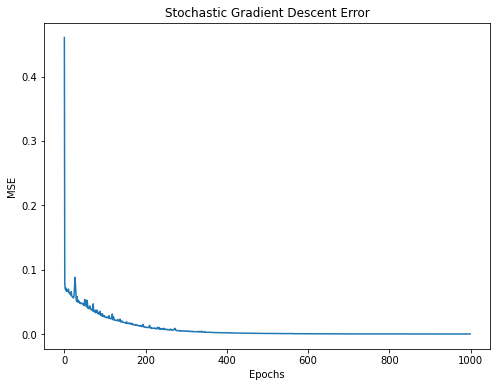

In [32]:
import pandas as pd

x = pd.Series([1, 2, 3, 5, 6, 7, 8])
y = pd.Series([1, 2, 3, 5, 6, 7, 8])

slope, intercept, mses = sgd(x, y, alpha=0.01, epoch=1000, batch_size=3)
# the model is the linear regression model
model_predictions = intercept + slope * x

# show the results
print('Slope and intercept: %s - %s' % (slope, intercept))
print('MSE: %s' % mean_squared_error(y, model_predictions))
plot_regression(x, y, model_predictions)
plot_mse(mses)

In [34]:
def plot_regression(x_values, y_values, y_predictions):
    plt.figure(figsize=(8, 6))
    plt.title('Regression with Stochastic Gradient Descent (SGD)')
    plt.scatter(x_values, y_values, label='Data Points')
    plt.plot(x_values, y_predictions, c='#FFA35B', label='Regression')
    plt.legend(fontsize=10)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()


def plot_mse(mse_values):
    plt.figure(figsize=(8, 6))
    plt.plot(range(len(mse_values)), mse_values)
    plt.title('Stochastic Gradient Descent Error')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.show()


def scale(values):
    return pd.Series([(i - values.min()) / (values.max() - values.min()) for i in values])

Slope and intercept: 0.4342354391895069 - [0.00502842]
MSE: 0.001196574037187634


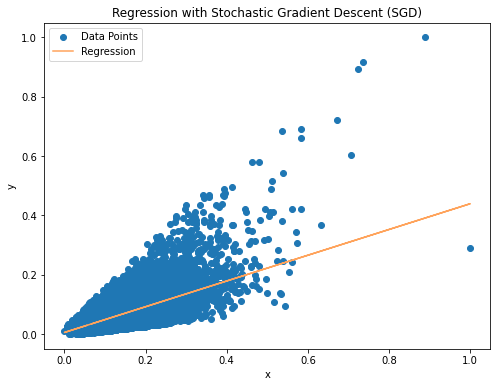

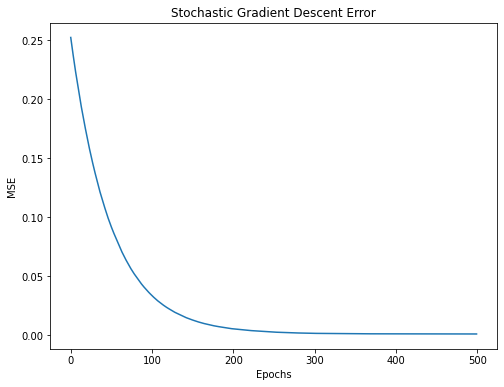

In [35]:
# read .csv into a DataFrame
house_data = pd.read_csv("Data/house_prices.csv")
size = house_data['sqft_living']
price = house_data['price']

# machine learning handle arrays not data-frames
x = np.array(size).reshape(-1, 1)
y = np.array(price).reshape(-1, 1)

# min-max normalization
x = scale(x)
y = scale(y)

# the SGD algorithms
slope, intercept, mses = sgd(x, y, alpha=0.005, epoch=500, batch_size=20)
# the model is the linear regression model
model_predictions = slope * x + intercept

# show the results
print('Slope and intercept: %s - %s' % (slope, intercept))
print('MSE: %s' % mean_squared_error(y, model_predictions))
plot_regression(x, y, model_predictions)
plot_mse(mses)

### Adaptive Gradient (ADAGrad)

- Small learning rate (alpha) means smaller steps in every iteration -> slow algorithm
- Large learning rate means larger steps in every iterations -> fast but inaccurate algorithm
- The problem with the standard gradient descent algorithm is that we make larger updates when the gradient is larger (and smaller updates when the gradient is smaller)
- We should change the learning rate independently for every feature (Gradient)

#### Adaptive Gradient
- AdaGrad was first constructed back in 2011 by John Duchi
- The problem with gradient descent is that the alpha learning rate is the smae for every feature (parameter)
- Every feature (parameter) has an indenpendent learning rate
- Parameters with large gradients have a corresponding rapid decrease in their learning rate vice-versa
- It is not sensitive to the initial learning rate values - as we have seen with standard gradient descent


In [42]:
# ADAGrad
import numpy as np


# cost-function, 3D dimensional
def f(x, y):
    return x * x + y * y + 3


# derivative of the cost-function
def df(x, y):
    return np.asarray([2.0 * x, 2.0 * y])


# gradient descent algorithm with AdaGrad
# bounds: [[-1, 1], [-1, 1]]
def adaptive_gradient(bounds, n, alpha, epsilon=1e-8):
    # generate an initial point
    solution = np.asarray([0.7, 0.8])

    # G values (sum of the squared past gradients)
    # we have 1 value for every feature (x and y in this case)
    # the value is the sum of the past squared gradients in every iteration
    g_sums = [0.0 for _ in range(bounds.shape[0])]

    # run the gradient descent
    for _ in range(n):
        # calculate gradients
        gradient = df(solution[0], solution[1])

        # update the sum of the squared gradients for all the features
        # (x and y in this case)
        for i in range(gradient.shape[0]):
            g_sums[i] += gradient[i] ** 2.0  # g_sum can be extremely large -> very small adaptive_alpha
                                             # -> small learning rate -> RMSProp

        # build a solution one variable at a time
        new_solution = []

        # we consider all the features (i.e., x and y) - as we use different learning rates
        for i in range(solution.shape[0]):
            # calculate the step size for that feature
            adaptive_alpha = alpha / (np.sqrt(g_sums[i]) + epsilon)
            new_solution.append(solution[i] - adaptive_alpha * gradient[i])

        solution = np.asarray(new_solution)
        solution_value = f(solution[0], solution[1])
        print('(%s) - function value: %s' % (solution, solution_value))



In [43]:
adaptive_gradient(np.asarray([[-1.0, 1.0], [-1.0, 1.0]]), 200, 0.1)

([0.6 0.7]) - function value: 3.850000001732143
([0.53492086 0.63414954]) - function value: 3.68828596962445
([0.48473591 0.5829175 ]) - function value: 3.574761711436232
([0.44333888 0.54031243]) - function value: 3.4884868810055414
([0.40793017 0.50358176]) - function value: 3.420001617983649
([0.37695219 0.47119337]) - function value: 3.364116149693996
([0.349432   0.44219064]) - function value: 3.317635287006385
([0.32471268 0.41592845]) - function value: 3.278434798670796
([0.30232509 0.39194685]) - function value: 3.2450227947694428
([0.2819196  0.36990386]) - function value: 3.2163075236975818
([0.26322678 0.34953661]) - function value: 3.1914641800410903
([0.24603331 0.33063763]) - function value: 3.169853631845781
([0.23016646 0.31303949]) - function value: 3.150970325125878
([0.21548375 0.29660457]) - function value: 3.1344075205618123
([0.20186573 0.28121794]) - function value: 3.1198333057014715
([0.1892109  0.26678231]) - function value: 3.1069735664496734
([0.17743197 0.2

### RMSProp Algorithm
- Root Mean Squared Propagation (RMSProp) is a modified version of the AdaGrad Algorithm
- It was first proposed by Geoffrey Hinton in 2012
- The problem with AdaGrad is that it considers all the past gradients
- It can result in a very small learning rates -> The algorithm will be extremely slow
- RMSProp uses a decaying average of squared gradients - it is essentially a moving average of past gradients
- Algorithm can focus on recent gradients that are more important

#### Analysis
- AdaGrad : s(t) = s(t-1) + g^2
  - The AdaGrad accumulates the squared gradients - which means it keeps growing without bound (due to lack of normalization)
- RMSProp: s(t) = beta * s(t-1) + (1-beta) * g^2
  - With RMSProp, we can use a beta decay parameter to prefer recent gradients (similar to momentum)

### Adam
- Adaptive Movement Estimation (ADAM) is the state-of-the-art optimization algorithm in machine learning
- It was first proposed by Diederik P. Kingma and Jimmy Ba in 2014
- The algorithm effectively combines momentum and the RMSProp approaches
- It computes the first movement (mean) and second moment (uncentered variance) of the gradient


#### Analysis
- Adam is a gradient based optimization algorithm as well so we need to the g(t) gradients (partial derivatives)
  - dC(b) / db0, dC(b)/db1
- We define m, v variables (arrays containing as many items as the number of features) - This is the first and second moment
  - m(t) = beta1 * m(t-1) + (1-beta1)g(t), v(t) = beta2 *v(t-1) + (1-beta2)g^2(t)
- These are the corrected m and v variables
  - m'(t) = m(t) / (1-beta1^2), v'(t) = v(t) / (1-beta2^2)
- The final formula, v(0) = 0, m(0) = 0
  - x(t) = x(t-1) - m'(t) / (v'(t)^1/2 + e)

In [50]:
# Adaptive Movement Estimation (ADAM)
import numpy as np


# cost-function
def f(x, y):
    return x * x + y * y + 5

# derivative of the cost-function
def df(x, y):
    return np.asarray([2.0 * x, 2.0 * y])

def adam(bounds, n, alpha, beta1, beta2, epsilon=1e-8):
    # generate an initial point (random usually)
    x = np.asarray([0.8, 0.9])
    # initialize first moment and second moment
    m = [0.0 for _ in range(bounds.shape[0])]
    v = [0.0 for _ in range(bounds.shape[0])]
    print(m, v)

    for t in range(1, n+1):
        # gradient g(t) so the partial derivatives
        g = df(x[0], x[1])

        # update every feature independently
        for i in range(x.shape[0]):
            m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
            v[i] = beta2 * v[i] + (1.0 - beta2) * g[i] ** 2
            m_corrected = m[i] / (1.0 - beta1 ** t)
            v_corrected = v[i] / (1.0 - beta2 ** t)
            x[i] = x[i] - alpha * m_corrected / (np.sqrt(v_corrected) + epsilon)

        print('(%s) - function value: %s' % (x, f(x[0], x[1])))

In [51]:
adam(np.asarray([[-1.0, 1.0], [-1.0, 1.0]]), 100, 0.05, 0.9, 0.999)

[0.0, 0.0] [0.0, 0.0]
([0.75 0.85]) - function value: 6.285000000940972
([0.70011004 0.80009484]) - function value: 6.130305817076774
([0.65041466 0.75035612]) - function value: 5.986073535023797
([0.60100761 0.70086216]) - function value: 5.852417918973276
([0.5519924  0.65169836]) - function value: 5.729406354490881
([0.50348278 0.60295742]) - function value: 5.617052567106095
([0.45560317 0.55473959]) - function value: 5.515310262227009
([0.40848872 0.50715269]) - function value: 5.424066892632939
([0.36228529 0.46031207]) - function value: 5.3431378290985325
([0.31714887 0.4143403 ]) - function value: 5.272261285005731
([0.27324467 0.36936671]) - function value: 5.211094420311869
([0.23074563 0.3255266 ]) - function value: 5.159211113286115
([0.18983024 0.28296008]) - function value: 5.116101925345768
([0.15067975 0.24181065]) - function value: 5.081176777471574
([0.11347466 0.20222336]) - function value: 5.05377078796582
([0.07839065 0.16434257]) - function value: 5.03315357649060